# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap                                   # import color maps

import warnings                                                                                 # Ignore Warnings
warnings.filterwarnings("ignore")

from math import sqrt

from sklearn.model_selection import train_test_split                     # to split train and test set

from sklearn.model_selection import GridSearchCV                        # to perform hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score


from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

# Importing the data set:

In [2]:
df=pd.read_csv("input/indian_liver_patient.csv")

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Data Visualization:

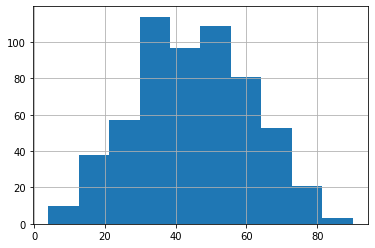

In [5]:
df['Age'].hist(bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25EADD4C8>,
      dtype=object)

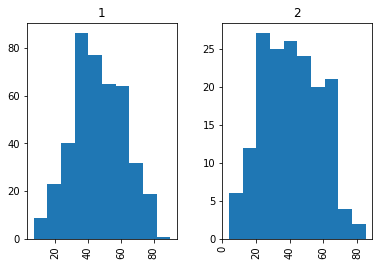

In [6]:
df.hist(column='Age',by='Dataset',bins=10)

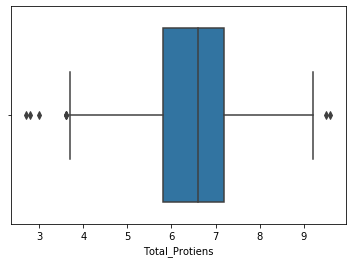

In [7]:
#BOXPLOT
import seaborn as sns
sns.boxplot(x=df['Total_Protiens'])

In [8]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [9]:
a=df.corr()
a

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


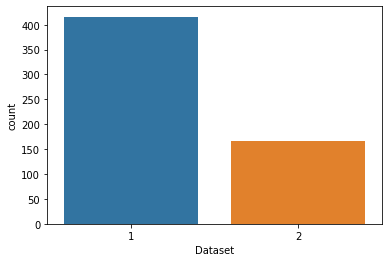

In [10]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


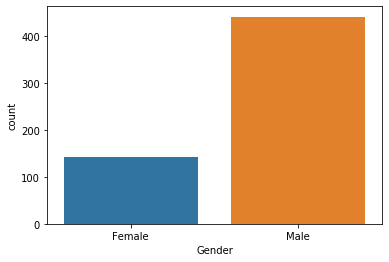

In [11]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

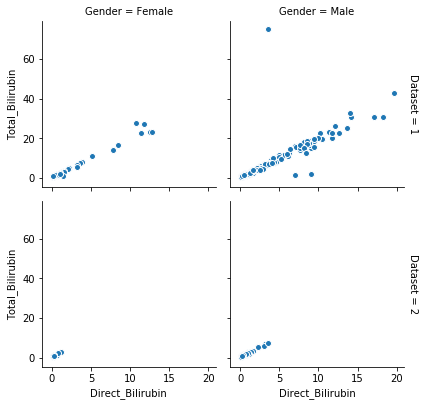

In [12]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

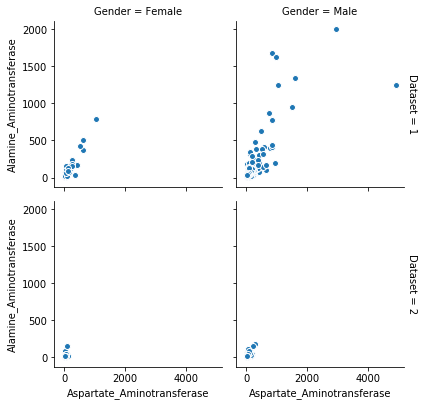

In [13]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

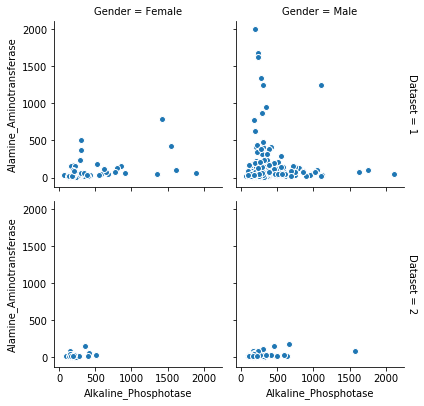

In [14]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

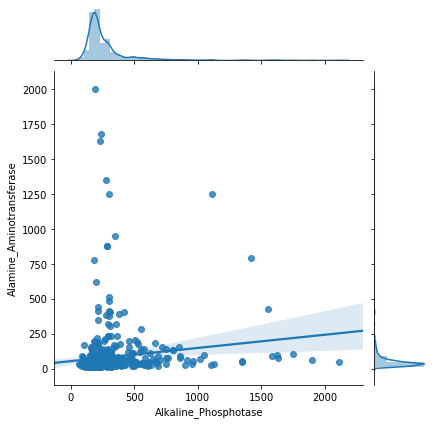

In [15]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

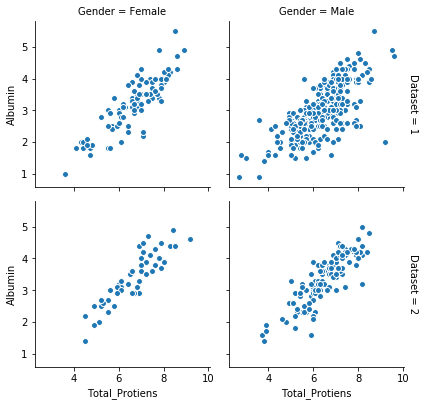

In [16]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

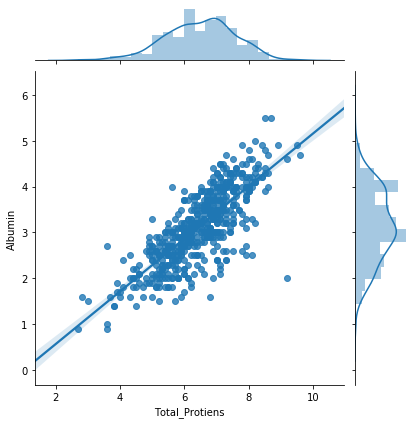

In [17]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

In [18]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [19]:
features=df.iloc[:,:-1].values

In [20]:
features

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [21]:
labels=df.iloc[:,-1].values

In [22]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,

# Handling of Missing Values: 

In [23]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [24]:
imputer.fit(features[:,[9]])
features[:,[9]]=imputer.fit_transform(features[:,[9]])

In [25]:
df1=pd.DataFrame(features)

In [26]:
df1.apply(lambda x:sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [27]:
cols=[1]

In [28]:
df1[cols]=df1[cols].fillna(df1.mode().iloc[0])

In [29]:
df1.apply(lambda x:sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [30]:
df1

,0,1,2,3,4,5,6,7,8,9
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7,3.3,0.89
3,58,Male,1,0.4,182,14,20,6.8,3.4,1
4,72,Male,3.9,2,195,27,59,7.3,2.4,0.4
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6,3.2,1.1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1


In [31]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


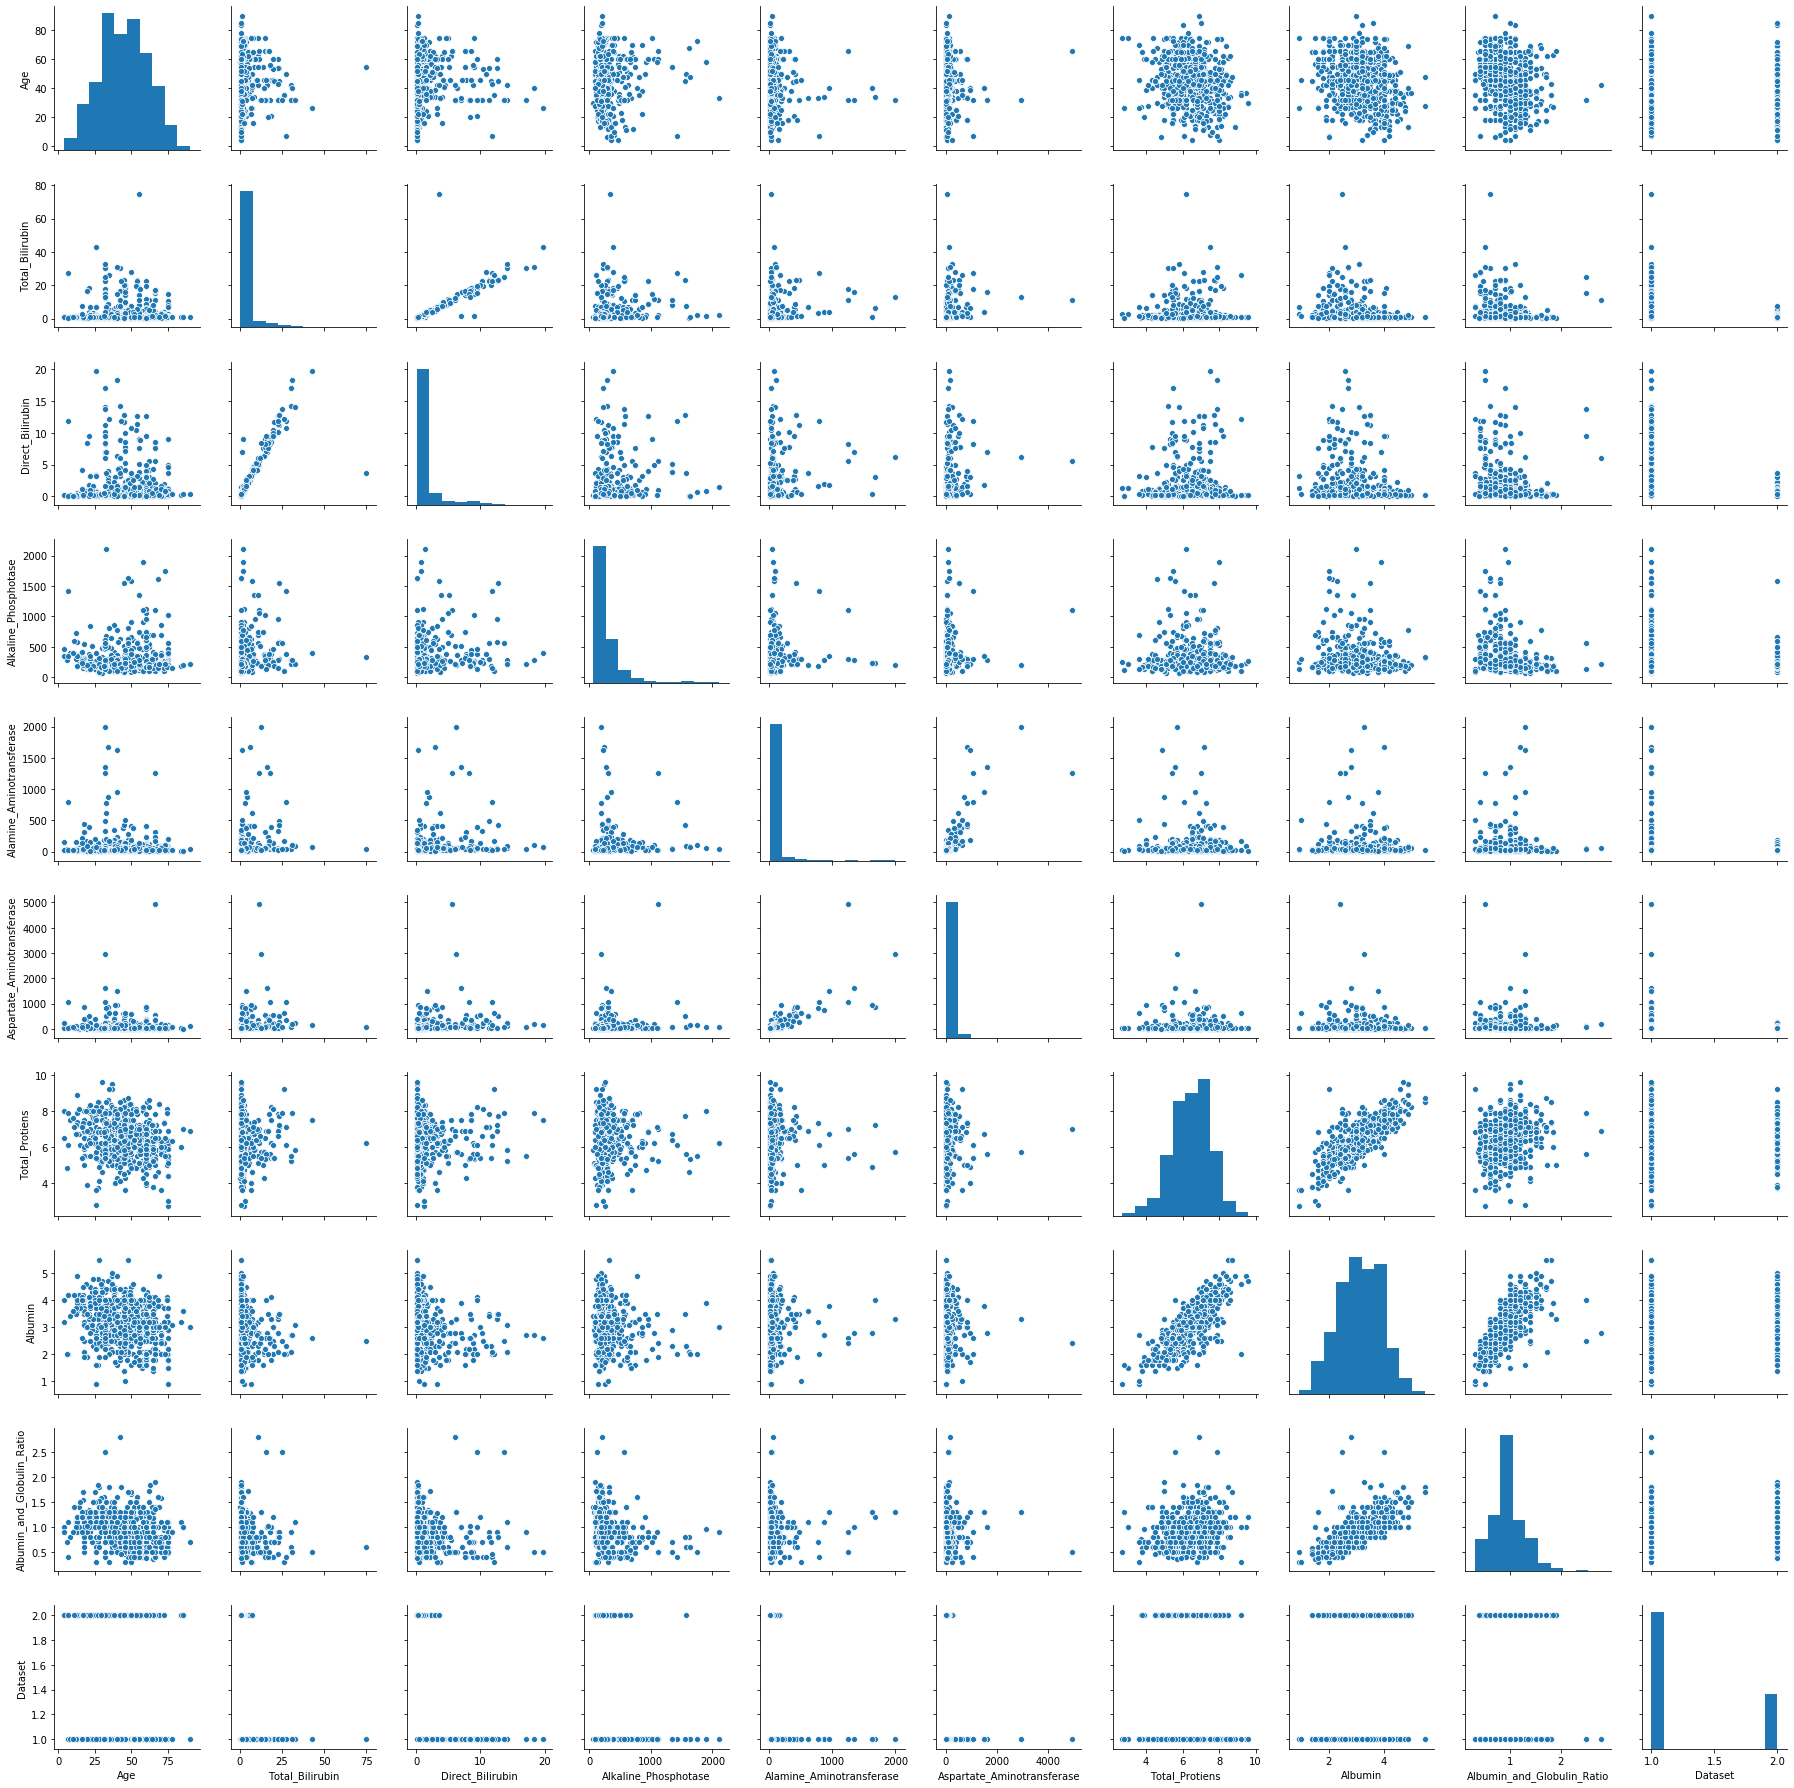

In [32]:
import seaborn as sns
sns.pairplot(df)

# Label Encoder:

In [33]:
 from sklearn import preprocessing                                              # import label encoder
label_encoder = preprocessing.LabelEncoder()                             # label_encoder object knows how to understand word labels. 
df['Gender']= label_encoder.fit_transform(df['Gender'])          # encode labels in column 'species'. 
df['Gender'].unique() 

array([0, 1], dtype=int64)

In [36]:
df

array([['1.0', '0.0', '65.0', ..., '3.3', '0.9', '1.0'],
       ['0.0', '1.0', '62.0', ..., '3.2', '0.74', '1.0'],
       ['0.0', '1.0', '62.0', ..., '3.3', '0.89', '1.0'],
       ...,
       ['0.0', '1.0', '52.0', ..., '3.2', '1.0', '1.0'],
       ['0.0', '1.0', '31.0', ..., '3.4', '1.0', '1.0'],
       ['0.0', '1.0', '38.0', ..., '4.4', '1.5', '2.0']], dtype='<U32')

# One Hot Encoder: 

In [34]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

# creating one hot encoder object with categorical feature 0 
# indicating the first column 
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[1])], remainder='passthrough') 
df = np.array(columnTransformer.fit_transform(df), dtype = np.str) 


In [35]:
df

array([['1.0', '0.0', '65.0', ..., '3.3', '0.9', '1.0'],
       ['0.0', '1.0', '62.0', ..., '3.2', '0.74', '1.0'],
       ['0.0', '1.0', '62.0', ..., '3.3', '0.89', '1.0'],
       ...,
       ['0.0', '1.0', '52.0', ..., '3.2', '1.0', '1.0'],
       ['0.0', '1.0', '31.0', ..., '3.4', '1.0', '1.0'],
       ['0.0', '1.0', '38.0', ..., '4.4', '1.5', '2.0']], dtype='<U32')

# Feature Scaling: 

In [37]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [38]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)

In [39]:
features_train

array([[55, 'Male', 1.1, ..., 6.2, 2.9, 0.8],
       [26, 'Male', 1.0, ..., 7.1, 3.7, 1.0],
       [66, 'Female', 0.7, ..., 6.4, 3.2, 1.0],
       ...,
       [69, 'Female', 0.8, ..., 8.4, 4.9, 1.4],
       [60, 'Male', 2.3, ..., 6.6, 3.5, 1.1],
       [26, 'Male', 42.8, ..., 7.5, 2.6, 0.5]], dtype=object)

In [40]:
features_test

array([[55, 'Male', 1.8, ..., 6.1, 2.7, 0.7],
       [60, 'Male', 8.6, ..., 7.4, 3.0, 0.6],
       [38, 'Male', 2.7, ..., 7.5, 4.2, 1.2],
       ...,
       [35, 'Male', 1.8, ..., 6.5, 3.2, 0.9],
       [27, 'Male', 1.0, ..., 6.8, 3.9, 1.85],
       [65, 'Female', 0.7, ..., 7.2, 3.5, 0.9]], dtype=object)

In [41]:
labels_train

array([2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [42]:
labels_test

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2], dtype=int64)

In [43]:
features_train=features_train.reshape((-1,1))

In [44]:
features_train

array([[55],
       ['Male'],
       [1.1],
       ...,
       [7.5],
       [2.6],
       [0.5]], dtype=object)

In [45]:
from sklearn.preprocessing import StandardScaler 

In [46]:
scaler = StandardScaler() 
scaler.fit(df) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaler.mean_

array([2.43567753e-01, 7.56432247e-01, 4.47461407e+01, 3.29879931e+00,
       1.48610635e+00, 2.90576329e+02, 8.07135506e+01, 1.09910806e+02,
       6.48319039e+00, 3.14185249e+00, 9.47063903e-01, 1.28644940e+00])

In [48]:
scaler.scale_

array([  0.42923479,   0.42923479,  16.17594241,   6.20419395,
         2.80608792, 242.72954814, 182.46366758, 288.67063666,
         1.08452017,   0.79483625,   0.319316  ,   0.45210191])

In [49]:
scaler.transform(df)

array([[ 1.76228085, -1.76228085,  1.25209764, ...,  0.19896867,
        -0.14738974, -0.63359475],
       [-0.56744644,  0.56744644,  1.06663704, ...,  0.07315659,
        -0.64846078, -0.63359475],
       [-0.56744644,  0.56744644,  1.06663704, ...,  0.19896867,
        -0.17870668, -0.63359475],
       ...,
       [-0.56744644,  0.56744644,  0.44843504, ...,  0.07315659,
         0.16577966, -0.63359475],
       [-0.56744644,  0.56744644, -0.84978917, ...,  0.32478075,
         0.16577966, -0.63359475],
       [-0.56744644,  0.56744644, -0.41704777, ...,  1.58290153,
         1.73162664,  1.57829591]])